In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from scipy import stats
import time

In [2]:
np.random.seed(21)
Ndata = 20000
mu = 1.0
sigma = 1.0
data = stats.norm(mu, sigma).rvs(Ndata)

In [3]:
def logLikelihood(x):
    # Gaussian likelihood 
    return np.sum(stats.norm(loc=x[0], scale=x[1]).logpdf(data))

def Prior(x):
    # create a uniform prior in mu and sigma
    prior_mu = stats.uniform.pdf(x[0], loc=0.5, scale=1.0)
    prior_sigma = stats.uniform.pdf(x[1], loc=0.5, scale=1.0)
    return  prior_mu * prior_sigma


def logPosterior(x):
    
    lp =  np.log(Prior(x))
    if not np.isfinite(lp):
        return -np.inf
    else:
        return logLikelihood(x) + lp

In [4]:
ndim = 2  # number of parameters in the model
nwalkers = 4  # number of MCMC walkers
nsteps = 5000  # number of MCMC steps to take **for each walker**

# initialize theta 
np.random.seed(0)
starting_guesses = np.array([1,1])+1e-3*np.random.randn(nwalkers, ndim)

In [5]:
# the function call where all the work happens: 
sampler = emcee.EnsembleSampler(nwalkers, ndim, logPosterior)

elapsed=time.time()
sampler.run_mcmc(starting_guesses, nsteps)
print(time.time()-elapsed)

62.28574252128601


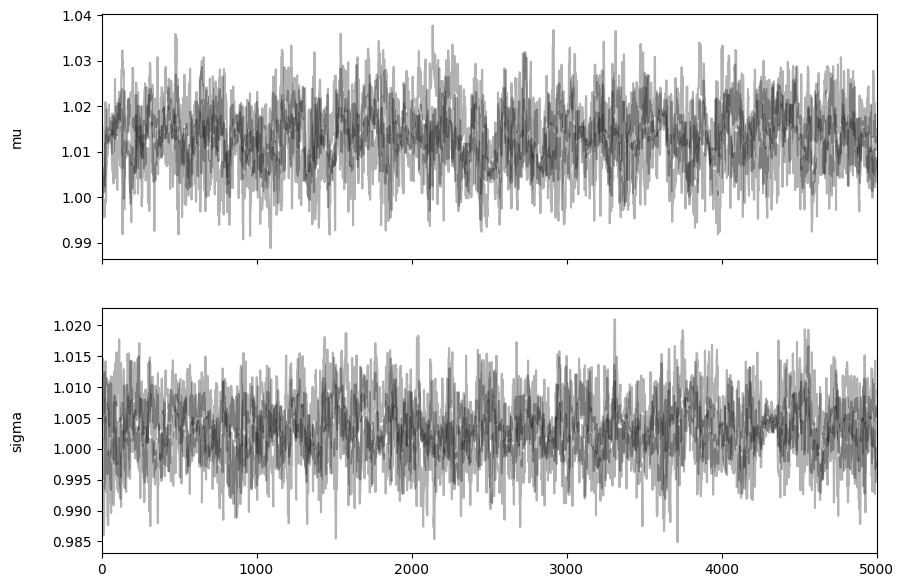

In [7]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["mu","sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

In [8]:
flat_samples = sampler.get_chain(discard=100, thin=30, flat=True)
print(flat_samples.shape)

(652, 2)


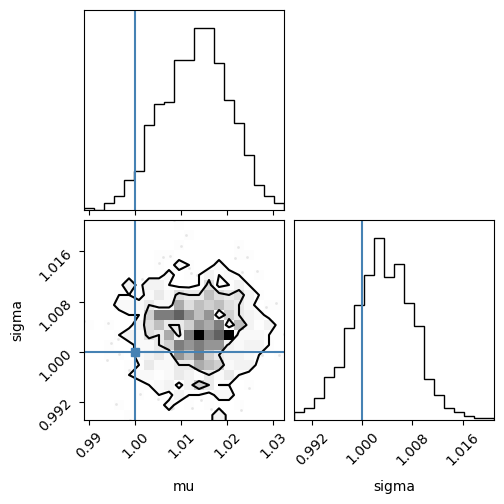

In [9]:
import corner
fig = corner.corner(
    flat_samples, labels=labels, levels=[0.68,0.95],truths=[1,1]
);